In [3]:
import os
print(os.getcwd())


c:\Users\Rohit\Desktop\Face


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


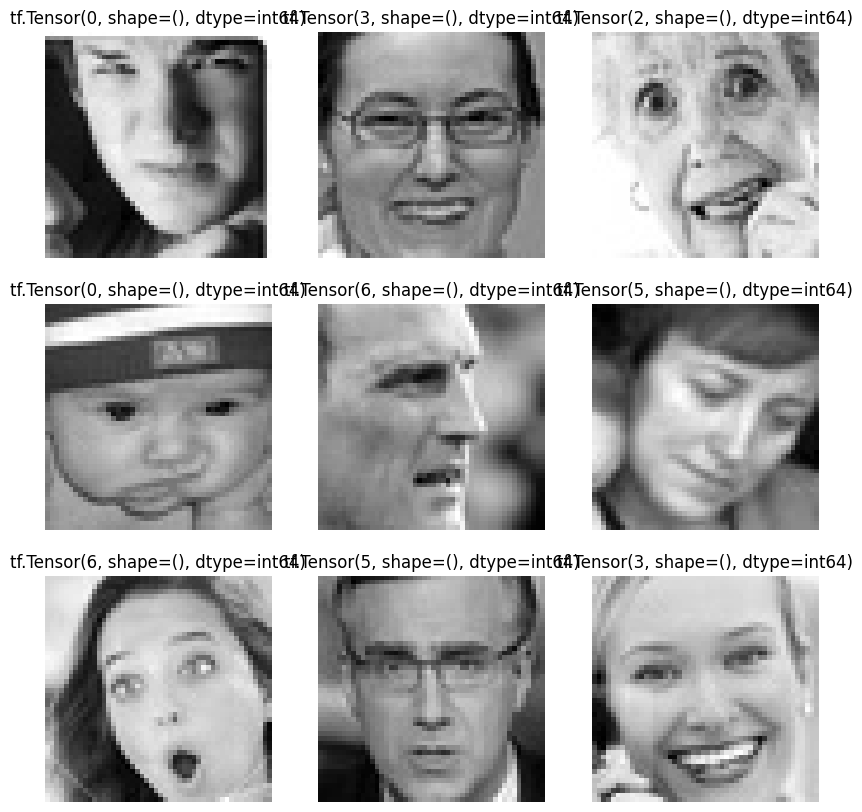

In [6]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Paths to your dataset folders
train_dir = "fer_dataset/train"
test_dir = "fer_dataset/test"

# Parameters
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32
NUM_CLASSES = 7

# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',   # automatically one-hot encodes
    color_mode='grayscale',     # your images are grayscale
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=True
)

# Load test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    color_mode='grayscale',
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Normalize pixel values
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds = train_ds.map(normalize)
test_ds = test_ds.map(normalize)

# Visualize some samples
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')
        plt.title(tf.argmax(labels[i]))
        plt.axis("off")
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

# Paths to your dataset
train_dir = "fer_dataset/train"
test_dir = "fer_dataset/test"


In [11]:
# Parameters
IMG_SIZE = (32, 32)   # smaller images for faster training
BATCH_SIZE = 32
NUM_CLASSES = 7
EPOCHS = 15
AUTOTUNE = tf.data.AUTOTUNE


In [12]:
# Training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
).map(lambda x, y: (x / 255.0, y)).cache().prefetch(buffer_size=AUTOTUNE)

# Test/Validation dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode='categorical',
    color_mode='grayscale',
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
).map(lambda x, y: (x / 255.0, y)).cache().prefetch(buffer_size=AUTOTUNE)


Found 28709 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


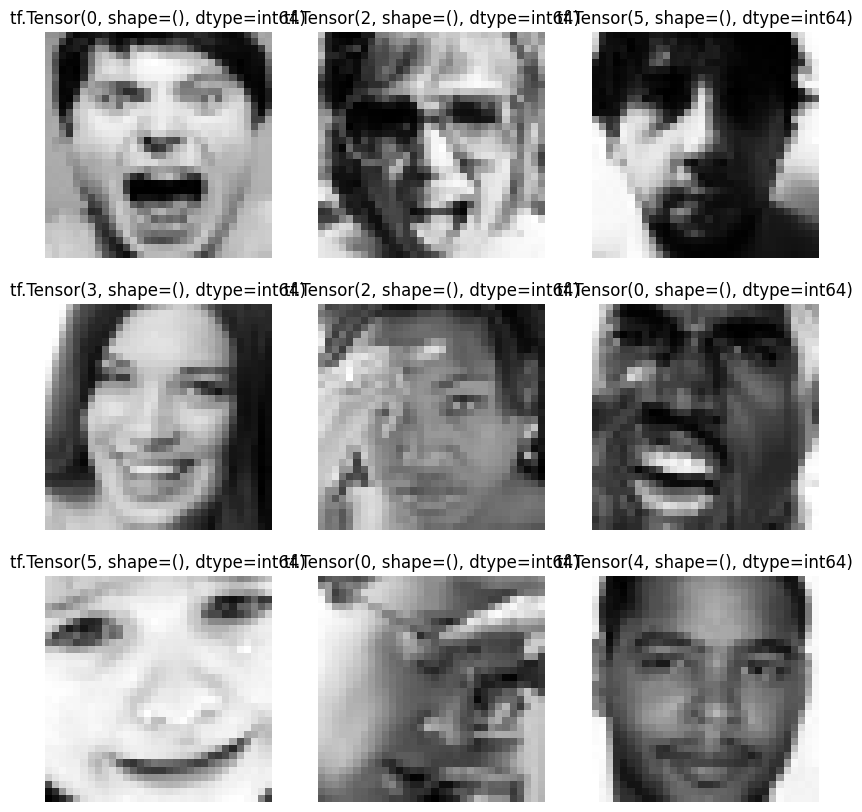

In [13]:
# Visualize some samples
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(tf.squeeze(images[i]), cmap='gray')
        plt.title(tf.argmax(labels[i]))
        plt.axis("off")
plt.show()


In [14]:
model = models.Sequential([
    layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,1)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax')
])


In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [16]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [17]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=EPOCHS,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/15
898/898 [==============================] - 1289s 1s/step - loss: 1.8081 - accuracy: 0.2506 - val_loss: 1.7063 - val_accuracy: 0.3023 - lr: 0.0010
Epoch 2/15
898/898 [==============================] - 106s 115ms/step - loss: 1.6917 - accuracy: 0.3222 - val_loss: 1.6073 - val_accuracy: 0.3580 - lr: 0.0010
Epoch 3/15
898/898 [==============================] - 41s 46ms/step - loss: 1.6084 - accuracy: 0.3724 - val_loss: 1.5276 - val_accuracy: 0.4138 - lr: 0.0010
Epoch 4/15
898/898 [==============================] - 43s 48ms/step - loss: 1.5501 - accuracy: 0.3960 - val_loss: 1.4682 - val_accuracy: 0.4411 - lr: 0.0010
Epoch 5/15
898/898 [==============================] - 34s 38ms/step - loss: 1.5161 - accuracy: 0.4127 - val_loss: 1.4243 - val_accuracy: 0.4518 - lr: 0.0010
Epoch 6/15
898/898 [==============================] - 35s 39ms/step - loss: 1.4781 - accuracy: 0.4328 - val_loss: 1.3980 - val_accuracy: 0.4713 - lr: 0.0010
Epoch 7/15
898/898 [==============================] - 40

In [18]:
model.save("fer_cnn_model.h5")


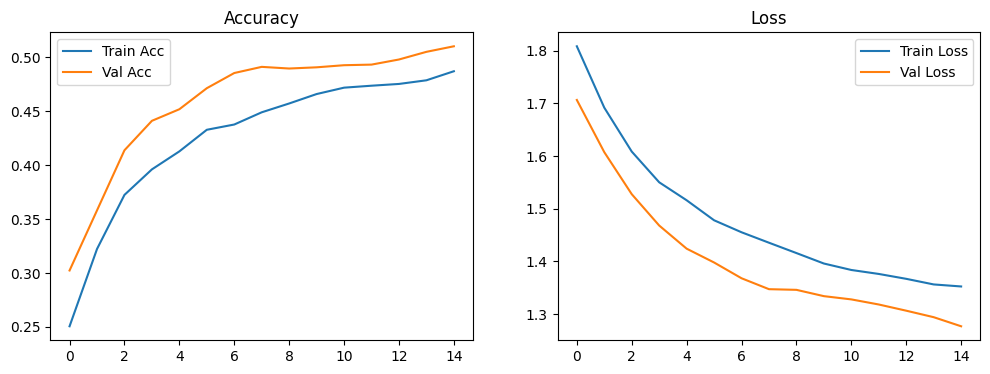

In [19]:
plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.legend()

plt.show()
